Cell 0 — Title / metadata (Markdown)

# Amazon EDA Analysis
**Author:** Pranav Mistry  
**Project root:** `C:\Users\prana\Amazon_EDA_Project`  
**Dataset:** `Data/amazon_synthetic_large.csv`  
**Purpose:** Perform Exploratory Data Analysis (EDA) using Pandas, Matplotlib, Seaborn. Save visuals in `outputs/plots` and derived CSVs in `outputs/data`.

In [ ]:
#Explanation: Title and quick metadata for your notebook. (Markdown cell)

Cell 1 — Imports & config

In [1]:
# standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# display options
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 50)
sns.set(style="whitegrid")

# paths (adjust if needed)
PROJECT_ROOT = r"C:\Users\prana\Amazon_EDA_Project"
DATA_PATH = os.path.join(PROJECT_ROOT, "Data", "amazon_synthetic_large.csv")
OUTPUT_DIR = os.path.join(PROJECT_ROOT, "outputs")
PLOTS_DIR = os.path.join(OUTPUT_DIR, "plots")
DERIVED_DIR = os.path.join(OUTPUT_DIR, "data")

# ensure output directories
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(DERIVED_DIR, exist_ok=True)

print("DATA PATH:", DATA_PATH)
print("PLOTS DIR:", PLOTS_DIR)
print("DERIVED DIR:", DERIVED_DIR)

DATA PATH: C:\Users\prana\Amazon_EDA_Project\Data\amazon_synthetic_large.csv
PLOTS DIR: C:\Users\prana\Amazon_EDA_Project\outputs\plots
DERIVED DIR: C:\Users\prana\Amazon_EDA_Project\outputs\data


In [ ]:
#Explanation: Imports, options, and ensures output directories exist. Running this cell prints the paths — confirm they match your setup.

Cell 2 — Load dataset (small preview)

In [6]:
# load dataset (use chunks if extremely large)
df = pd.read_csv(DATA_PATH)
print("Loaded shape:", df.shape)
df.head(5)

Loaded shape: (200000, 20)


,order_id,order_date,ship_date,review_date,product_id,product_title,category,brand,price,quantity,shipping_cost,total_amount,rating,review_title,review_text,helpful_votes,verified_purchase,reviewer_id,return_flag,payment_type
0,O3119737,18-02-2022,23-02-2022,12-04-2022,P103757,Acme Home & Kitchen Gadget 439,Jewelry,BookHouse,39.32,1,0.00,39.32,5,Great product,Used it for weeks better than expected and qua...,0,True,R270047,0,UPI
1,O3072272,24-06-2019,27-06-2019,26-08-2019,P100005,StyleCo Electronics Gadget 1946,Beauty,BookHouse,44.37,1,0.00,44.37,5,Value for money,My experience: not worth the price and quality...,0,True,R269432,0,Gift Card
2,O3158154,10-11-2020,12-11-2020,06-02-2021,P100378,StyleCo Home & Kitchen Gadget 1489,Electronics,PrimeTech,34.82,1,0.00,34.82,4,Okay,I bought this excellent and would not recommend.,2,True,R232506,0,Credit Card
3,O3065426,25-08-2024,01-09-2024,08-09-2024,P103556,Acme Books Gadget 241,Clothing,PrimeTech,11.24,1,2.99,14.23,4,Okay,My experience: not worth the price and battery...,0,True,R257417,0,COD
4,O3030074,30-06-2019,02-07-2019,14-07-2019,P100718,OmniGoods Toys & Games Gadget 727,Toys & Games,StyleCo,7.05,1,2.99,10.04,5,Highly recommend,Delivery was excellent and works as described.,0,True,R211256,0,Credit Card


In [ ]:
#Explanation: Loads CSV into df. df.head() shows first 5 rows. If file is huge and causes memory issues, let me know and I’ll show chunked reading.

Cell 3 — Quick info & missing values

In [4]:
# quick info
print("Columns and dtypes:")
display(df.dtypes)

# missing values summary
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

Columns and dtypes:


order_id              object
order_date            object
ship_date             object
review_date           object
product_id            object
product_title         object
category              object
brand                 object
price                float64
quantity               int64
shipping_cost        float64
total_amount         float64
rating                 int64
review_title          object
review_text           object
helpful_votes          int64
verified_purchase       bool
reviewer_id           object
return_flag            int64
payment_type          object
dtype: object

Series([], dtype: int64)

In [ ]:
#Explanation: Shows datatypes and columns with missing counts. Use this to decide cleaning strategy.

Cell 4 — Basic cleaning: duplicates, whitespace, type fixes

In [5]:
# 1. Drop exact duplicates
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before-after} duplicate rows")

# 2. Strip whitespace from object columns
obj_cols = df.select_dtypes(include='object').columns.tolist()
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip()

# 3. Convert common numeric columns to numeric if they exist
for col in ['price','total_amount','quantity','shipping_cost','rating']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# show result
df.info()

Dropped 0 duplicate rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           200000 non-null  object 
 1   order_date         200000 non-null  object 
 2   ship_date          200000 non-null  object 
 3   review_date        200000 non-null  object 
 4   product_id         200000 non-null  object 
 5   product_title      200000 non-null  object 
 6   category           200000 non-null  object 
 7   brand              200000 non-null  object 
 8   price              200000 non-null  float64
 9   quantity           200000 non-null  int64  
 10  shipping_cost      200000 non-null  float64
 11  total_amount       200000 non-null  float64
 12  rating             200000 non-null  int64  
 13  review_title       200000 non-null  object 
 14  review_text        200000 non-null  object 
 15  helpful_votes      200000 

In [ ]:
#Explanation: Removes duplicates, strips text columns, coerces common numeric columns to numeric (non-numeric becomes NaN).

Cell 5 — Parse date columns & feature creation (delivery days, review delay)

In [8]:
# parse dates
for col in ['order_date','ship_date','review_date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# feature: delivery days
if 'order_date' in df.columns and 'ship_date' in df.columns:
    df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days

# feature: review delay
if 'review_date' in df.columns and 'order_date' in df.columns:
    df['review_delay_days'] = (df['review_date'] - df['order_date']).dt.days

# feature: review length
if 'review_text' in df.columns:
    df['review_length'] = df['review_text'].astype(str).apply(len)

# feature: price per item
if 'total_amount' in df.columns and 'quantity' in df.columns:
    df['price_per_item'] = df['total_amount'] / df['quantity'].replace(0,1)

df[['delivery_days','review_delay_days','review_length','price_per_item']].describe()

,delivery_days,review_delay_days,review_length,price_per_item
count,200000.000000,78845.000000,200000.000000,200000.000000
mean,3.495755,46.537460,50.649940,45.705502
std,2.287920,145.264019,8.143902,39.541633
min,0.000000,-323.000000,33.000000,5.000000
25%,1.000000,-57.000000,44.000000,18.656250
50%,4.000000,46.000000,50.000000,32.740000
75%,5.000000,150.000000,58.000000,60.440000
max,7.000000,419.000000,65.000000,490.230000


In [ ]:
#Explanation: Creates useful features for analysis. describe() gives quick stats.

Cell 6 — Handle missing values (strategy explained & applied)

In [9]:
# print missing %
missing_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
display(missing_pct[missing_pct > 0].round(2))

# Strategy (example):
# - Numeric: fill with median (robust)
# - Categorical: fill with "Unknown"
# - If critical column (like product_id) has many missing, consider dropping rows

# Apply:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)

for c in cat_cols:
    df[c].fillna("Unknown", inplace=True)

print("Missing values after fill:", df.isna().sum().sum())

review_date          60.58
review_delay_days    60.58
dtype: float64

Missing values after fill: 121155


In [ ]:
#Explanation: Shows percent missing and applies a conservative fill strategy. If you prefer different handling for some columns, we can customize.

Cell 7 — Descriptive statistics & top-level summaries

In [10]:
# numeric summary
num_summary = df.describe().T
display(num_summary)

# top N product categories
if 'category' in df.columns:
    top_cats = df['category'].value_counts().head(15)
    display(top_cats)

,count,mean,min,25%,50%,75%,max,std
order_date,200000,2021-12-01 13:33:44.208000,2019-01-01 00:00:00,2020-06-15 00:00:00,2021-12-02 00:00:00,2023-05-18 00:00:00,2024-10-31 00:00:00,NaN
ship_date,200000,2021-12-05 01:27:37.440000256,2019-01-01 00:00:00,2020-06-18 00:00:00,2021-12-06 00:00:00,2023-05-21 00:00:00,2024-11-07 00:00:00,NaN
review_date,78845,2022-01-15 05:41:16.509607168,2019-01-02 00:00:00,2020-08-06 00:00:00,2022-01-12 00:00:00,2023-07-03 00:00:00,2025-12-01 00:00:00,NaN
price,200000.0,45.057652,5.0,16.51,32.74,60.44,490.23,40.052818
quantity,200000.0,1.119725,1.0,1.0,1.0,1.0,3.0,0.381158
shipping_cost,200000.0,0.683735,0.0,0.0,0.0,0.0,4.99,1.482916
total_amount,200000.0,51.134931,5.0,19.81,35.3,65.81,1300.71,49.974938
rating,200000.0,4.191605,1.0,4.0,5.0,5.0,5.0,1.026995
helpful_votes,200000.0,0.498085,0.0,0.0,0.0,1.0,6.0,0.70736
return_flag,200000.0,0.050355,0.0,0.0,0.0,0.0,1.0,0.218677


category
Grocery           20203
Clothing          20169
Toys & Games      20156
Electronics       20101
Beauty            20005
Automotive        19959
Sports            19902
Books             19870
Jewelry           19833
Home & Kitchen    19802
Name: count, dtype: int64

In [ ]:
#Explanation: Save these to CSV if desired; quick sense of distributions and top categories.

Cell 8 — Save cleaned dataset & numeric summary

In [11]:
cleaned_path = os.path.join(DERIVED_DIR, "cleaned_amazon.csv")
num_stats_path = os.path.join(DERIVED_DIR, "numeric_stats.csv")

df.to_csv(cleaned_path, index=False)
num_summary.to_csv(num_stats_path)

print("Saved cleaned data to:", cleaned_path)
print("Saved numeric stats to:", num_stats_path)


Saved cleaned data to: C:\Users\prana\Amazon_EDA_Project\outputs\data\cleaned_amazon.csv
Saved numeric stats to: C:\Users\prana\Amazon_EDA_Project\outputs\data\numeric_stats.csv


In [ ]:
#Explanation: Persists cleaned data and stats for reproducibility and for Power BI import later.

Cell 9 — Visual: numeric distributions (sample if needed)

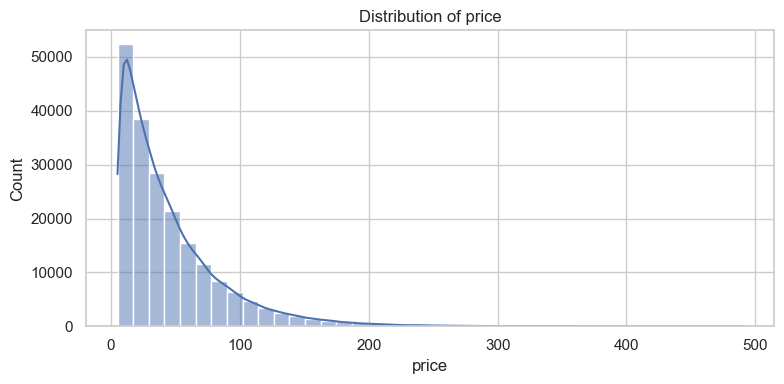

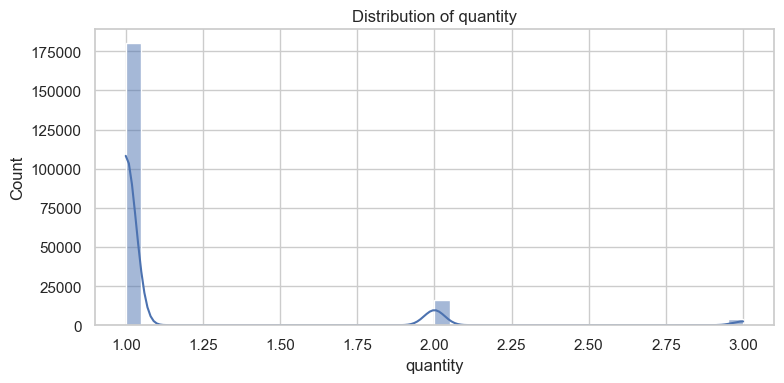

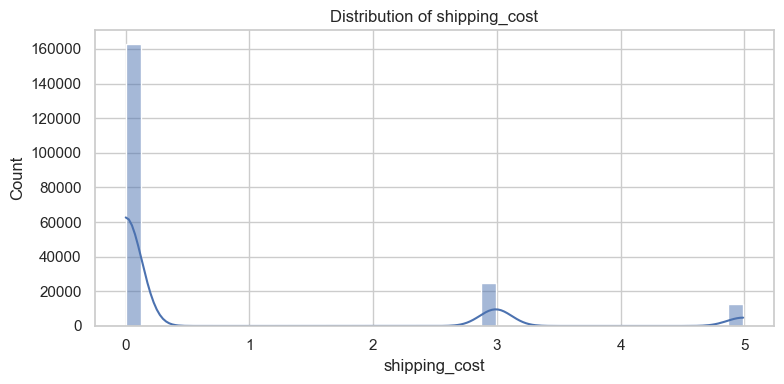

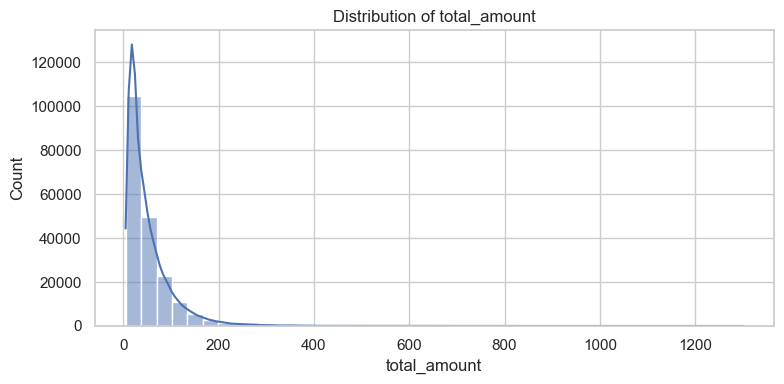

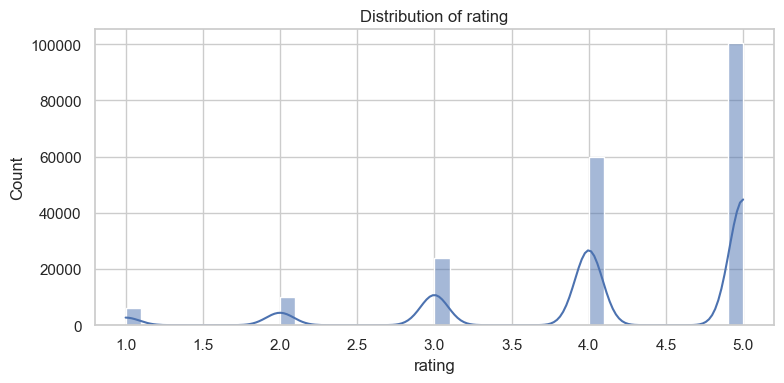

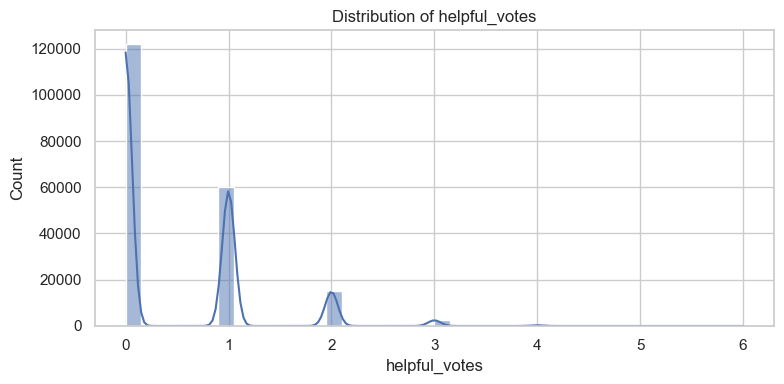

In [12]:
# choose numeric cols to plot (limit number to avoid clutter)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plot_cols = numeric_cols[:6]  # first 6 numeric columns

for col in plot_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    out_file = os.path.join(PLOTS_DIR, f"{col}_dist.png")
    plt.savefig(out_file, bbox_inches='tight', dpi=150)
    plt.show()

In [ ]:
#Explanation: Plots distributions and saves them to outputs/plots. If dataset is huge, seaborn may be slow — we're using all rows but can sample: df[col].dropna().sample(5000).

Cell 10 — Visual: correlation heatmap

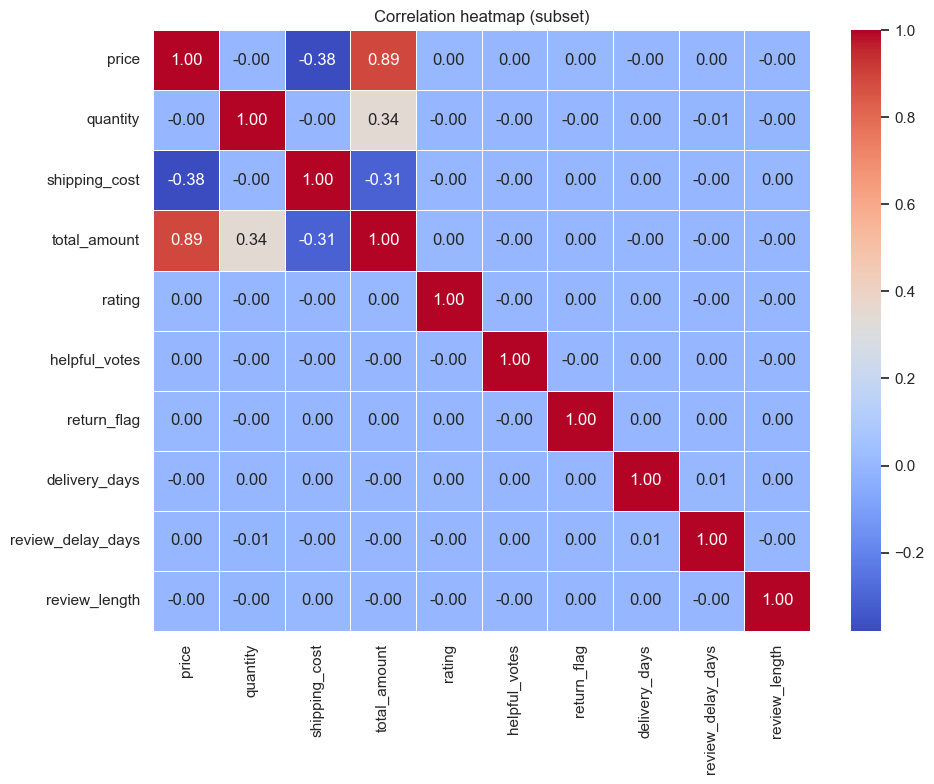

In [13]:
# correlation heatmap (consider subset if many columns)
corr_cols = numeric_cols[:10]  # pick up to 10 numeric columns for clarity
corr = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation heatmap (subset)")
plt.tight_layout()
heatmap_path = os.path.join(PLOTS_DIR, "correlation_heatmap.png")
plt.savefig(heatmap_path, bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
#Explanation: Correlation matrix for numeric features. If you want full set, increase corr_cols.

Cell 11 — Visual: category counts (bar chart)

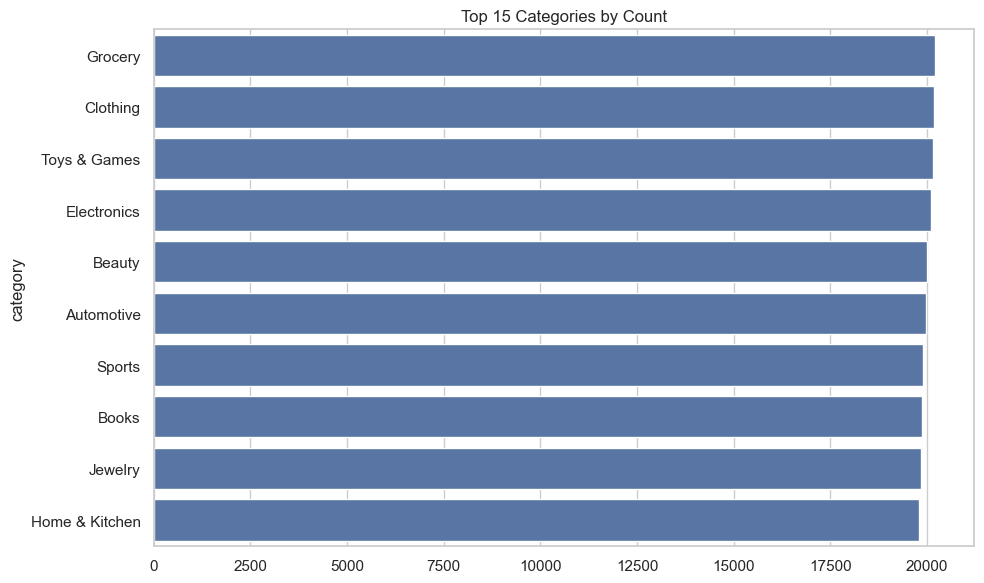

In [14]:
if 'category' in df.columns:
    plt.figure(figsize=(10,6))
    top_cats = df['category'].value_counts().head(15)
    sns.barplot(y=top_cats.index, x=top_cats.values)
    plt.title("Top 15 Categories by Count")
    plt.tight_layout()
    bar_path = os.path.join(PLOTS_DIR, "top_categories.png")
    plt.savefig(bar_path, bbox_inches='tight', dpi=150)
    plt.show()

In [ ]:
#Explanation: Shows the most frequent categories.

Cell 12 — Visual: rating distribution + review length by rating

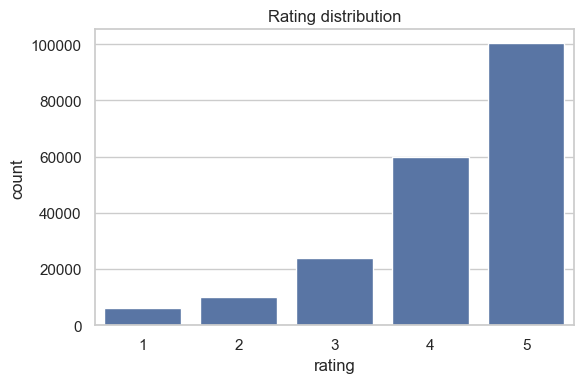

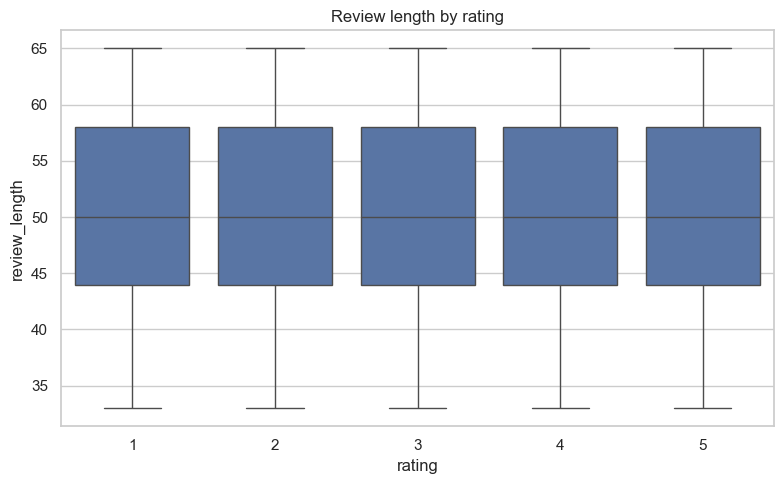

In [15]:
if 'rating' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='rating', data=df)
    plt.title("Rating distribution")
    plt.tight_layout()
    plt.show()

if 'review_length' in df.columns and 'rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='rating', y='review_length', data=df)
    plt.title("Review length by rating")
    plt.tight_layout()
    box_path = os.path.join(PLOTS_DIR, "review_length_by_rating.png")
    plt.savefig(box_path, bbox_inches='tight', dpi=150)
    plt.show()

In [ ]:
#Explanation: Visualize how review length relates to rating (useful to see longer critical reviews etc).

Cell 13 — Top products by revenue / quantity

In [16]:
if 'product_id' in df.columns and 'total_amount' in df.columns:
    agg = df.groupby(['product_id']).agg(
        total_revenue=('total_amount','sum'),
        total_qty=('quantity','sum'),
        avg_rating=('rating','mean')
    ).sort_values('total_revenue', ascending=False).head(20).reset_index()
    display(agg.head(10))
    agg.to_csv(os.path.join(DERIVED_DIR, "top_products_by_revenue.csv"), index=False)
    print("Saved top products by revenue to outputs/data/top_products_by_revenue.csv")


,product_id,total_revenue,total_qty,avg_rating
0,P101348,4040.33,62,4.120000
1,P102216,3941.17,49,4.441860
2,P102015,3810.97,68,4.153846
3,P103240,3787.90,67,4.389831
4,P101823,3686.33,64,4.150000
5,P100815,3676.28,73,4.400000
6,P104839,3667.63,64,4.327586
7,P103856,3665.75,69,4.350877
8,P101600,3636.81,61,4.226415
9,P104491,3620.97,55,3.904762


Saved top products by revenue to outputs/data/top_products_by_revenue.csv


In [ ]:
#Explanation: Aggregates at product level to find top revenue drivers. Save to CSV to use in reports.

Cell 14 — Basic text analysis (top words in reviews)

In [17]:
# sample reviews to speed up
if 'review_text' in df.columns:
    sample_texts = df['review_text'].dropna().sample(min(5000, len(df)), random_state=42)
    counter = Counter()
    for t in sample_texts:
        tokens = re.findall(r'\b[a-zA-Z]{3,}\b', t.lower())
        counter.update(tokens)
    most_common = counter.most_common(25)
    pd.DataFrame(most_common, columns=['word','count']).head(20)

In [ ]:
#Explanation: Simple token frequency — helps spot recurring themes (quality, delivery, packaging, etc). 
#For deeper sentiment analysis we can add TextBlob or VADER.

Cell 15 — Quick insights summary (Markdown)

## Quick Findings (example)
- Top categories: `...` (replace with actual)
- Rating distribution shows majority at X stars.
- Correlation: `price` vs `rating` correlation is approx `...`.
- Top product by revenue: product_id `...` with revenue `...`.

In [ ]:
#Explanation: Fill this with actual numbers from the outputs to create a one-paragraph summary you can place in README or LinkedIn post.

Cell 16 — Save key plots into a presentation-ready folder (optional)

In [19]:
report_plots_dir = os.path.join(PROJECT_ROOT, "report_plots")
os.makedirs(report_plots_dir, exist_ok=True)

# copy selected plots to report folder
to_copy = ["top_categories.png", "correlation_heatmap.png", "price_dist.png"]  # adjust names you created
for fname in os.listdir(PLOTS_DIR):
    srcf = os.path.join(PLOTS_DIR, fname)
    dstf = os.path.join(report_plots_dir, fname)
    if os.path.isfile(srcf):
        try:
            import shutil
            shutil.copy(srcf, dstf)
        except Exception as e:
            pass

print("Report plots ready in:", report_plots_dir)

Report plots ready in: C:\Users\prana\Amazon_EDA_Project\report_plots


In [ ]:
#Explanation: Prepares images for a PPT or README screenshot.